In [171]:
import fitsio
import lusee
import healpy as hp
import matplotlib
font = {'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
import scipy.linalg as la


In [182]:
freq = np.arange(1,51)
data = fitsio.read('../simulation/output/sim_v1_fine.fits')
sig = fitsio.read('../simulation/output/sim_v1_rsig.fits')

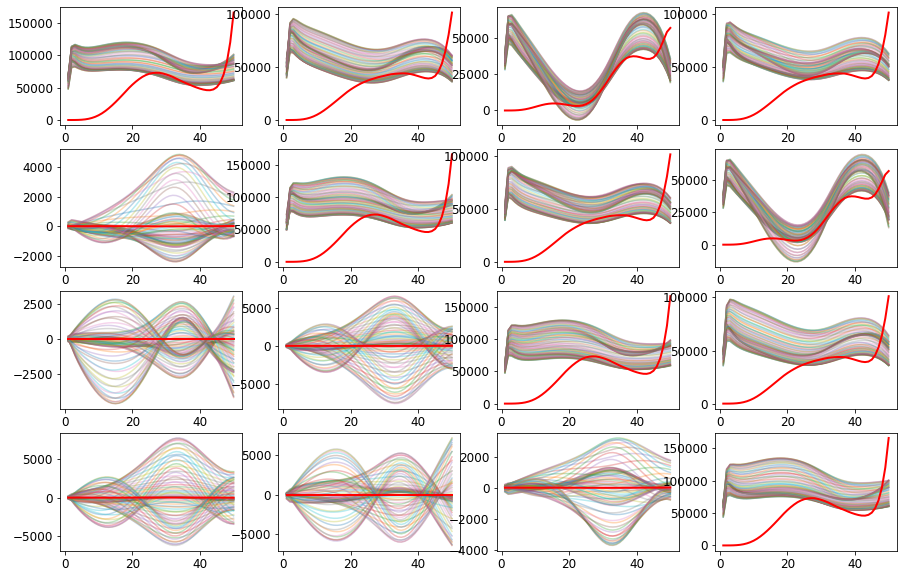

In [219]:
d={(0,0):0,(0,2):1, (2,0):2,(2,2):3,(0,1):4, (1,0):5,(1,1):6,(1,3):7,(3,1):8,(3,3):9,(0,3):10,(3,0):11,(1,2):12,(2,1):13,(2,3):14,(3,2):15}
cc=1
font = {'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)
w=(freq/10)**2.0
plt.figure(figsize=(15,10))
for i in range(4):
    for j in range(4):
        plt.subplot(4,4,cc)
        for k in range(0,data.shape[0],500):
            plt.plot(freq,w*data[k,d[(i,j)]],alpha=0.3)
        plt.plot(freq,-1e6*w*sig[0,d[(i,j)]],'r-',lw=2)
        cc+=1

In [221]:
a=np.array([d.flatten() for d in data])
s=sig[0,:].flatten()

f = np.hstack([freq]*16)
w = (f/10)**2

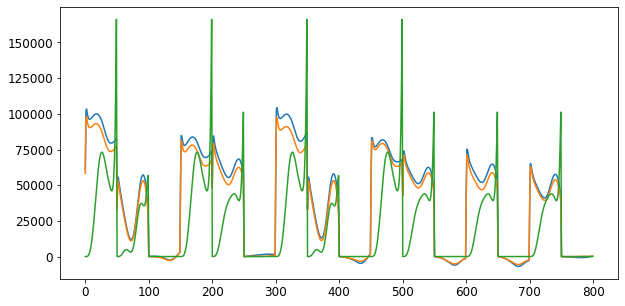

In [222]:
plt.figure(figsize=(10,5))
plt.plot(a[0,:]*w)
plt.plot(a[1000,:]*w)
plt.plot(-s*1e6*w)

In [223]:
C = np.cov(a*w[None,:],rowvar=False)

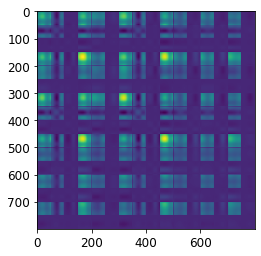

In [227]:
plt.imshow(C,interpolation='nearest')

In [224]:
eva,eve = la.eig(C)
eva=np.real(eva)
eve=np.real(eve)

[]

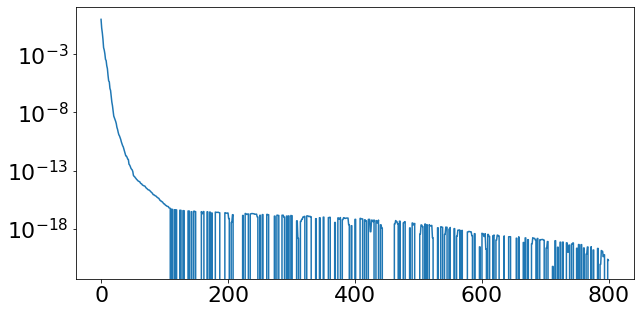

In [187]:
plt.figure(figsize=(10,5))

plt.plot(eva/eva[0])

plt.semilogy()

Text(0, 0.5, 'Sig x 1e4 filtering')

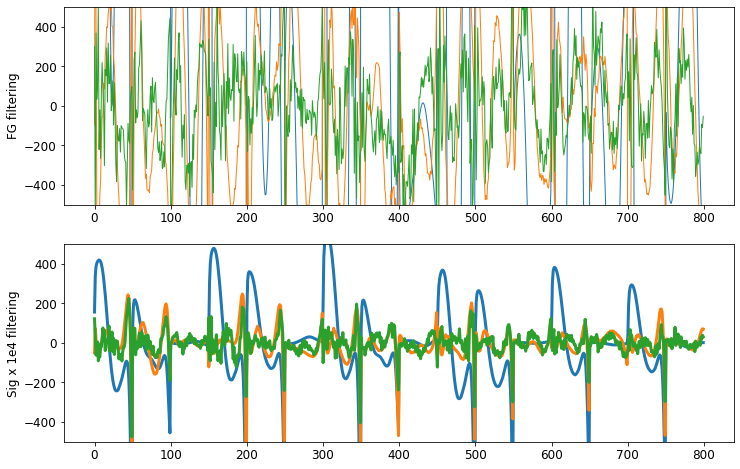

In [237]:
plt.figure(figsize=(12,8))
b=np.copy(a*w)
bs=np.copy(s*w*10000)
#plt.plot((a*w).mean(axis=0))
eve = np.real(eve)
for i in range(82):
    v = eve[:,i]
    coef = (b*v[None,:]).sum(axis=1)/(v**2).sum() 
    bs -= (bs*v).sum()/(v**2).sum() * v
    b -= np.outer(coef,v)
    
    if (i%40==1):
        plt.subplot(2,1,1)
        plt.plot(b.mean(axis=0),"-",lw=1)
        plt.ylim(-500,500)
        plt.subplot(2,1,2)
        plt.plot(bs,"-",lw=3)
        plt.ylim(-500,500)
plt.subplot(2,1,1)
plt.ylabel("FG filtering")
plt.subplot(2,1,2)
plt.ylabel("Sig x 1e4 filtering")

[]

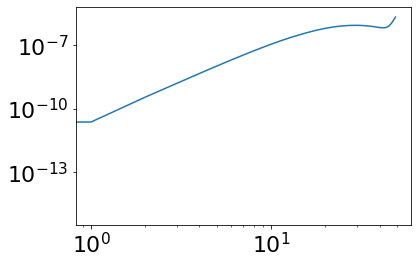

In [181]:
plt.plot(-s[:50]/a.mean(axis=0)[:50])
plt.loglog()

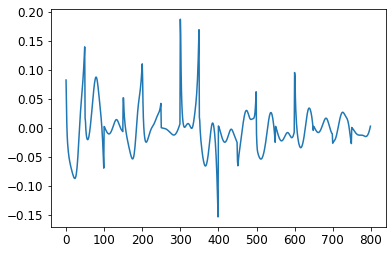

In [232]:
plt.plot(eve[:,5])